Declan Halbert
U79196431

# CS 237 Lab Four: Simulating Random Variables
In this lab we will explore the notion of random variables, which will be a very important topic for the next few weeks. We will think about creating random variables for certain characteristic frequency distributions corresponding to the various canonical problems (such as flipping a coin until a heads appears), and then explore the notion of expected value and the best strategy for a game. 

In [51]:
# Here are some imports which will be used in code that we write for CS 237

# Jupyter notebook specific 

from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML   

# Imports potentially used for this lab

import numpy as np                # arrays and functions which operate on array
from numpy import linspace, arange
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation

from numpy.random import random, randint, uniform, choice, shuffle
from collections import Counter

%matplotlib inline


## Problem One: Generating Random Floating-Point Numbers in [0..1)
In this problem we will investigate how to implement the <code>function numpy.random.random()</code>, which generates random 32-bit floating-point numbers in the range [0..1). Essentially, this is a random variable implemented in Python. This will form the basis for a variety of similar random variables representing other canonical problems, such as flipping coins. 

<b>Hash functions</b> 
As you may recall from CS 112, hash functions map key values to buckets in a hash table: the hash function appears to be spreading the keys uniformly randomly over the buckets, but in fact there is nothing random about it, since we can easily repeat the computation to find the key later. This is called pseudo-random behavior: the hash function is not random, but appears to be so unless you know the rule used to compute the hash function. 

The simplest hash functions use the linear-congruential method, which you may remember from CS 112; using prime numbers as multiplier and modulus are a good way to simulate random behavior:

In [6]:
A = 492876847     # the 26 millionth prime
M = 982451653     # the 50 millionth prime   

def hash(x):
    return (A * x) % M

# Test it!
X = [231,45,123,87,133,123]
for x in X:
    print(hash(x))

872611562
565521749
694301348
634864610
710811553
694301348


## Part (A): Pseudo-random number generation (done for you!).
However, we want to generate a series of numbers which appear to be uniformly randomly distributed over the range [0 .. M), and so we will start with a seed value and successively apply the hash function to generate a series of pseudo-random numbers $n_0$, $n_1$, $n_2$, etc.

<blockquote>

$n_0 = \text{hash(seed)}$<br>

$n_2 = \text{hash(hash(seed))}$<br>

...<br>

$n_k = \text{hash}^{k+1}\text{(seed)}$
</blockquote>

In [7]:
seed = 15485863    # The millionth prime

def nextRandom():
    global seed
    seed = hash(seed)
    return seed

# Test it
for x in range(10):
    print(nextRandom())    

646681346
895509231
325074873
292163047
611220391
881986056
973416690
145543584
538375161
697934142


## Part (B): Pseudo-random Floats.
Now convert this into a random variable which produces floating-point values in the range [0..1):

In [133]:
def nextUniform():
    x = nextRandom()/M;
    return x         # your code here

# Test it!
for x in range(1,11):
    print(nextUniform())

0.5060987230075942
0.8667093595902373
0.4202253533182258
0.1729481338660845
0.9144496497681601
0.11798505264462107
0.7406098486151155
0.042565452327657696
0.9343847355713085
0.3533153096542248


## Part (C) Testing for Randomness: Test One -- The Pair Test.
 Now we will test our function <code>nextUniform()</code>. For the first test, simply complete this problem (from Lab 1) which will display a sequence of random X's in a plane bounded by [0..1) in the X and Y axis. You should see a randomly spread out collection of X's with no discernable patterns. 

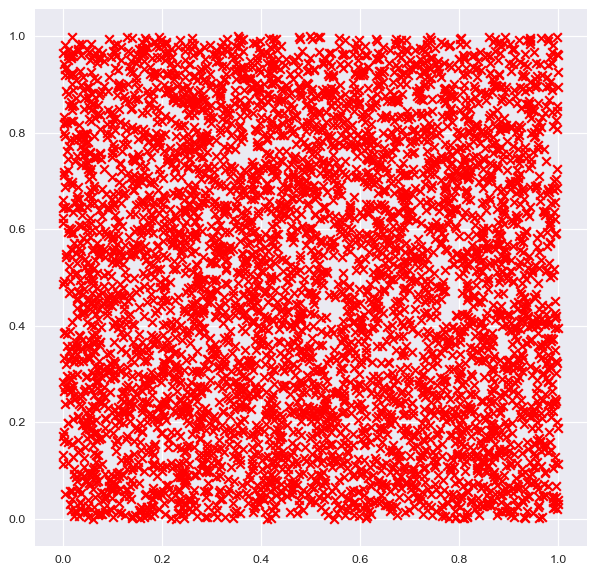

In [134]:
def random_plane_plot(num_trials):
    x_vals = []     # your code here
    y_vals = []    # your code here
    for i in range(num_trials):
        x_vals.append(nextUniform())
        y_vals.append(nextUniform())
    plt.figure(num=None, figsize=(8, 8), dpi=89)          
    plt.scatter(x_vals, y_vals, marker='x', c='red')
    plt.show()

# Test this by running this cell several times!
random_plane_plot(5000)

## Part (D) Test Two: The Histogram Test.  

Convert these floating-point numbers into integers in the range [0, ..., 100) by multiplying by 100 and then converting to an int (which will truncate the fractional part). If we histogram a sequence of 1 million such values, we should get an approximately uniform distribution over the range [0, .., 100). 

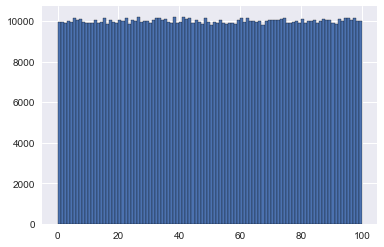

In [156]:
num_trials = 1000000
num = []
for i in range(num_trials):
    num.append(int(nextUniform()*100))
plt.hist([num],bins= range(101),edgecolor='black')
plt.show()
# Test this by running this cell several times!

# Problem Two (A): Generating Random Integers in a Range [a, ..., b)
Now we will investigate generating random integers in a specific range, from a (inclusive) to b (exclusive, as usual in ranges in Python); this is
equivalent to the numpy.random function <code>randint(a,b)</code>; the random variable looks like this:

    S = { a,       a+1,     ...., b-1 }
    P = { 1/(b-a), 1/(b-a), ...., 1/(b-a) }
    
As we shall explore later this week, this is called a Discrete Uniform random variable. 

In [181]:
def nextDiscreteUniform(a,b):
    return int(nextUniform() * (b-a) + a)

# Test it!
for k in range(10):
    print(nextDiscreteUniform(5,20))

11
11
19
14
18
7
17
13
18
9


In [182]:
num_trials = 10000
for k in range(num_trials):
    print(nextDiscreteUniform(0,10))
# Test this by running this cell several times!

8
3
0
1
9
2
7
3
7
1
6
6
5
2
9
6
1
8
5
7
8
2
2
2
5
5
9
8
7
0
5
6
3
4
6
9
2
2
0
0
4
4
9
2
1
2
4
5
4
0
7
3
1
8
7
6
3
6
9
9
3
6
4
7
1
0
3
5
6
0
0
6
8
8
6
0
5
3
8
1
7
6
5
0
8
1
2
6
7
2
1
5
0
7
9
6
8
2
9
0
8
2
7
1
0
0
6
2
2
7
6
2
8
4
8
3
4
6
2
5
1
1
4
6
6
9
4
3
0
4
4
9
7
7
5
7
3
0
8
2
2
6
3
0
2
8
1
5
9
0
2
3
0
0
4
9
3
1
3
4
9
2
3
9
2
2
7
1
6
8
7
7
4
1
9
7
6
6
4
1
8
4
5
6
5
1
9
9
9
7
2
8
0
2
5
4
6
5
2
6
6
8
5
3
7
3
3
4
3
5
3
6
4
8
9
3
5
5
7
8
1
2
9
2
8
5
5
1
0
7
7
6
2
2
5
9
6
1
0
4
5
2
8
8
1
3
1
3
7
2
2
9
4
5
2
7
4
3
3
7
8
6
1
4
4
3
4
9
3
2
8
2
6
9
9
2
4
1
4
2
0
4
9
8
8
7
8
2
9
6
8
4
9
1
2
6
9
3
2
6
3
0
1
7
8
2
5
4
0
4
6
9
8
0
3
8
9
4
5
0
3
2
8
9
4
1
8
3
8
9
2
8
1
7
7
0
7
7
9
9
0
6
4
7
8
4
7
8
3
8
1
6
3
0
0
1
7
2
1
5
0
6
8
5
5
6
6
7
9
4
5
8
7
9
5
4
8
8
7
5
9
9
4
2
2
1
9
1
2
2
8
3
6
2
4
2
5
1
3
0
4
5
9
6
9
6
5
8
6
6
0
7
8
8
3
6
8
8
3
0
7
3
5
4
9
9
6
3
3
1
3
2
3
8
9
4
2
5
4
4
4
4
5
3
0
8
1
3
4
2
1
2
1
7
7
3
4
7
3
5
9
7
7
4
0
2
5
8
2
9
5
0
1
5
5
4
8
5
2
9
8
7
8
0
4
5
8
6
5
7
8
7
9
2
7
0
3
2
2
5


9
5
8
1
2
6
1
9
6
9
4
2
4
9
5
7
3
6
1
9
8
0
2
1
1
1
2
0
7
7
7
4
7
3
2
6
4
5
6
7
2
0
9
6
2
9
0
1
4
2
5
8
4
4
1
7
4
3
3
7
5
7
9
5
7
3
8
2
1
2
1
4
7
7
2
1
2
6
1
6
1
3
4
7
4
8
2
5
5
8
9
2
6
8
3
7
4
7
3
0
0
0
0
1
6
1
1
2
4
1
7
6
3
4
7
7
3
3
7
9
5
2
0
9
8
3
5
6
5
1
4
3
0
3
7
2
9
4
0
6
9
3
5
7
9
4
3
5
6
2
8
0
4
0
3
0
7
4
7
2
3
3
9
0
7
7
2
8
9
9
6
8
4
4
0
4
3
9
0
8
1
8
9
5
2
4
6
4
3
8
0
6
0
7
9
3
3
5
7
2
7
5
8
2
3
2
8
5
2
0
5
6
7
1
7
2
8
2
6
7
2
1
8
1
9
0
5
2
7
3
6
8
6
7
3
6
3
4
9
1
1
1
0
7
2
8
9
0
6
7
9
1
0
3
6
7
9
9
2
3
1
2
8
6
0
4
7
3
5
7
2
7
8
5
4
6
9
5
3
3
2
2
1
3
9
2
5
1
7
2
7
3
9
9
0
7
7
1
9
2
0
5
7
4
7
6
2
7
4
6
5
0
3
2
6
7
6
6
1
0
7
3
7
6
1
7
8
4
3
2
5
5
8
0
5
4
2
3
9
8
1
3
6
7
4
0
0
1
1
2
3
9
8
9
5
5
3
6
9
6
0
2
5
8
5
6
9
8
5
6
9
4
7
6
8
7
3
7
1
5
6
6
0
9
8
5
1
6
4
1
3
4
7
5
2
7
4
1
7
6
3
8
7
1
0
1
3
8
7
6
9
6
6
9
2
2
1
4
1
1
3
9
3
9
7
8
3
0
4
0
5
9
3
8
9
1
0
5
1
4
7
8
5
9
2
5
6
1
5
7
3
6
3
8
2
0
3
1
2
8
0
1
2
6
7
7
2
8
5
7
5
4
2
3
3
0
1
6
7
6
5
0
2
3
1
3
4
2
3
9
3
6
6
1
8
6
7
5
0
1


## Problem Two (B): Sampling without replacement
In this problem we will create our own version of the numpy choice function, which we used extensively in Lab Three. There are two steps: first create a function shuffle(...) which takes a list and creates a random permutation, and then slice the list to return some number <code>size</code> of elements from the front of the list. It is exactly the same as shuffling a deck and then dealing out a number of cards from the top.

In [184]:
# shuffle a list X by choosing two indices using the function nextDiscreteUniform just created
# in part (A) and swapping the two elements at those indices. Repeat this 10 * len(X) times.
# Do NOT destroy the list, but make a copy before shuffling it.

def shuffle(X):
    newX = list(X)      # make a copy of the list!
    # Your code here
    for i in range(10* len(X)):
        Pos1 = nextDiscreteUniform(0,10)
        Pos2 = nextDiscreteUniform(0,10)
        Swapper = newX[Pos2]     
        newX[Pos2] = newX[Pos1]
        newX[Pos1] = Swapper
    
    return newX

# Test it!
X = [1,2,3,4,5,6,7,8,9,10]
for k in range(10):
    print(shuffle(X))

[1, 8, 9, 3, 5, 7, 2, 6, 4, 10]
[9, 4, 2, 8, 1, 7, 5, 6, 10, 3]
[2, 3, 4, 6, 10, 5, 1, 7, 8, 9]
[1, 9, 8, 10, 2, 4, 3, 7, 6, 5]
[2, 5, 4, 9, 3, 6, 10, 7, 8, 1]
[8, 2, 4, 6, 5, 7, 3, 1, 10, 9]
[6, 5, 7, 1, 2, 9, 8, 10, 3, 4]
[8, 7, 10, 6, 1, 2, 5, 3, 9, 4]
[4, 5, 10, 3, 8, 1, 7, 6, 2, 9]
[6, 7, 9, 3, 10, 2, 4, 8, 5, 1]


In [393]:
# Return a list of length size of elements from the list X; if replace is True, 
# simply select elements from the list using nextDiscreteUniform; if False, shuffle 
# the list and slice an initial part of the list and return it.

def my_choice(X,replace=False,size=1):
    mylist = []
    dupes = []
    if replace==True:
        for i in range(size):
            j = nextDiscreteUniform(X[0],len(X)+1)
            mylist.append(j)  
        return mylist
    if replace==False:
        y = shuffle(X)
        return y[0:size]
    
# Test it!
X = [1,2,3,4,5,6,7,8,9,10]
for k in range(10):
    print(my_choice(X,replace=True,size=8))
    
print()
for k in range(10):
    print(my_choice(X,replace=False,size=8))

[1, 3, 6, 10, 1, 8, 5, 2]
[6, 1, 10, 7, 10, 1, 2, 4]
[9, 6, 1, 4, 10, 10, 7, 9]
[6, 2, 2, 8, 6, 10, 5, 2]
[2, 2, 5, 4, 5, 9, 4, 8]
[2, 9, 9, 5, 3, 3, 5, 9]
[4, 7, 4, 10, 8, 2, 7, 2]
[3, 3, 6, 5, 4, 3, 3, 8]
[2, 1, 5, 4, 8, 2, 4, 3]
[2, 9, 1, 10, 4, 8, 2, 6]

[10, 2, 8, 9, 1, 4, 5, 6]
[9, 7, 4, 8, 1, 5, 2, 10]
[3, 1, 4, 5, 8, 10, 9, 6]
[3, 6, 2, 10, 8, 1, 5, 7]
[7, 6, 3, 8, 4, 5, 2, 10]
[6, 4, 5, 8, 1, 7, 3, 10]
[1, 4, 9, 2, 3, 7, 5, 8]
[1, 10, 7, 9, 3, 5, 6, 8]
[5, 1, 9, 4, 10, 7, 8, 3]
[4, 7, 1, 10, 6, 2, 5, 9]


## Problem Three (A): Generating Random Coin Flips
In this problem we will investigate how to implement a random variable that simulates the flipping of a (possibly unfair) coin, where the probability of a heads is p, and returning True ("success") if a heads turns up, and False ("failure") if tails; the random variable is thus:

    S = { False, True }
    P = { 1-p,   p }
    
As we shall explore later this week, this is called a Bernoulli random variable. 

In [224]:
def nextBernoulli(p):
    x = nextUniform()
    if x < 1-p:
        return False
    return True          # Your code here

for k in range(10):
    print(nextBernoulli(.6))

True
True
True
True
True
True
False
False
True
False


In [46]:
num_trials = 10000

# Your code here to show a histogram for p = 0.6

## Problem Three (B): Counting Heads in N Random Coin Flips
In this problem we will investigate how to implement a random variable that simulates the following problem: Flip a (possibly unfair) coin (where the probability of heads is p) N times -- how many heads appeared?
    
As we shall explore later this week, this is called a Binomial random variable. 

We shall generate these random numbers by a simple technique of simulating the flipping of coins, using the solution to the previous problem. 

In [142]:
def nextBinomial(N,p):
    count = 0
    for i in range(N):
        if nextBernoulli(p) == True:
            count = count+1
    return count

# Test it!
for k in range(10):
    print(nextBinomial(5,0.5))

2
4
3
4
4
2
3
3
2
2


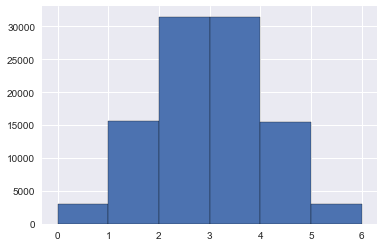

In [275]:
num_trials = 100000
x = []
for k in range(num_trials):
    x.append(nextBinomial(5,.5))
    
plt.hist([x],bins= range(7),edgecolor='black')
plt.show()

## Problem Four: How many flips until a head appears?
In this problem we will investigate how to implement a random variable that 
simulates the following problem: Flip a (possibly unfair) coin (where the 
probability of heads is p) until a head appears -- how many flips did it take?  

The key thing to understand is that if it takes k flips, then it took (k-1) tails (with probability 1-p) and then one head (with probability p):

      S = { 1, 2,       3,           ....   k                 ....  }
      P = { p, (1-p)*p, (1-p)^2 * p, ....   (1-p)^(k-1) * p   ....  } 
    
As we shall explore later this week, this is called a Geometric random variable. 

We could do a simulation, as in the last problem, but we will explore two new techniques 
for generating random variables, one based on the Cumulative Distribution Function, and 
the other based on an explicit formula for transforming the Uniform distribution for [0..1) into
the random variable we are trying to create. 

###  Part (A) Using the CDF to generate random values

The algorithm for doing this is actually very simple: just generate a random value U in the range [0..1) and when you sum up the values in the CDF, stop when you exceed U. For example, if p = 0.3, then the CDF is as follows:

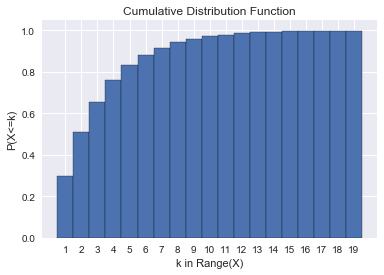

Rng(X) = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
  F(X) = [ 0.3         0.51        0.657       0.7599      0.83193     0.882351
  0.9176457   0.94235199  0.95964639  0.97175248  0.98022673  0.98615871
  0.9903111   0.99321777  0.99525244  0.99667671  0.99767369  0.99837159
  0.99886011]


In [49]:
p = 0.3
X = range(1,20)
probs = [(1-p)**(k-1)*p for k in X]
cum_probs = np.zeros(len(probs))
for i in range(len(probs)):
    for j in range(i+1):
        cum_probs[i] += probs[j]

plt.bar(X,cum_probs, tick_label=X,width=1.0,edgecolor='black')
plt.title('Cumulative Distribution Function')
plt.ylabel("P(X<=k)")
plt.xlabel("k in Range(X)")
plt.show()
print("Rng(X) = " + str(list(X)))
print("  F(X) = " + str(cum_probs))

Therefore, your algorithm would simply generate a random value U in [0..1) and
simply add f(1), f(2), f(3), etc. until exceeding the value of U.

In [324]:
def nextGeometric(p):
    value = nextUniform()
    flips = 0
    prob = 0
    for x in range(1,100000):
        if prob >= value:
            return flips
        prob = ((1-p)**(x-1)*p) + prob
        flips += 1        

# Test it
for k in range(10):
    print(nextGeometric(0.5))
    

3
2
2
2
1
3
3
1
1
1


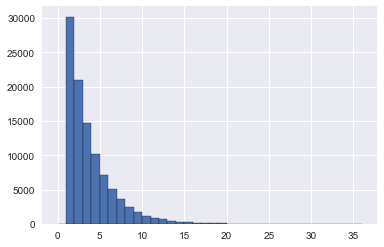

In [327]:
num_trials = 100000
alist = []
for g in range(num_trials):
    alist.append(nextGeometric(0.3))

plt.hist([alist],bins = range(max(alist)),edgecolor='black')
plt.show()

# Your code here to show a histogram for p = 0.3

#  Part (B) Using an explicit formula to generate random values

In the previous problems we considered generating random numbers by simulation and by the inverting the CDF.  Now we will explore using an explicit function for the inverse of the CDF. The following formula is described in the literature: if U is a value uniformly-distributed in the range [0..1), then

          1 + floor[ log( U )  /  log( 1 - p )  ]           # log is to the base e
          
is an integer which is distributed according to the Geometric Distribution with probability p.

In [345]:
def nextGeometric2(p):
    U = nextUniform()
    Y = 1 + np.floor(np.log(U)/np.log(1-p))
    return int(Y)     # Your code here

# Test it!
for k in range(10):
    print(nextGeometric2(0.3))

3
5
11
1
1
10
1
1
3
4


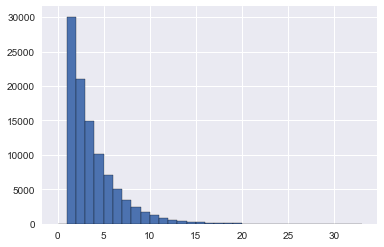

In [346]:
num_trials = 100000
alist = []
for g in range(num_trials):
    alist.append(nextGeometric2(0.3))

plt.hist([alist],bins = range(max(alist)),edgecolor='black')
plt.show()

## Problem 5: What is the best strategy for the game of Twenty-One?
Now suppose we want to actually figure out the right way to gamble, using random variables and distributions.  We'll go back to dice....

We will play a version of blackjack called Twenty-One and figure out the best strategy for the game:

### Twenty One
This game is similar to the famous card game blackjack. We will play a one-player version of the game. The game is played for some number N of rounds (we will use N = 10,000), at the end of which the player wins points. The player accumulates points during the whole game, and the objective is, of course, to end up with the maximum number of points. 

The objective in each round of the game is to score as close to 21 as possible by rolling a die as many times as you wish and adding all the numbers that appear. When a player's total exceeds 21, he is 'busted' and gets 0 points. If the player chooses to stop rolling before he exceeds 21, then he wins whatever his total is at that point. So for example, if a player rolls 5, 2, 4, and then 6, his total at that point is 17, and he has to decide whether it is worth trying again: he will be busted if he gets 5 or more (since 17+5=22), but will get a better total if he gets 4 or less.  

There are many variations on this game, some involving multiple players, or a "banker" or different numbers of dice, or alcohol..... <a href="https://www.youtube.com/watch?v=G_IHHNjdIEk">here</a> is a short YT video explaining the basic game.

A computer can play this game with a suitable strategy. For this problem, we will consider a strategy to be simply an integer K which is the value at which you stop rolling (thinking that you are close enough to 21). The number K is fixed for the entire game. For example, if you set K = 19, then in every round, you will keep rolling if your sum to that point is less than 19; if you get a num &ge; 19 you stop. Clearly, any good strategy will be a number at least 15, since 15+6=21 and if you roll again at 15, you will never bust. But we will try all possible strategies. 

### The problem
You should write a function <code>playRound(K)</code> which rolls a single die until you reach or exceed K or get busted, and either return your score (if you reached or exceeded K), or 0 (if you were busted). Then write a function <code>playGame()</code> which calls <code>playRound(K)</code> for N = 10,000 times for each K and returns an array of 21 numbers giving the average payoff for each K = 1, ..., 21.

Your task is to answer the following questions: 

   - For each K = 1 .. 21, what is the average payoff per round for a game played with this strategy?

   - What is the best strategy for the game, meaning what value of K wins the most points on average?

Print out the values and an appropriate bar chart for the first question, and simply print out the answer to the second question using a print(...) function.

Table of Contents:

1. Best Score for Each K
2. Array of those Values
3. Bar Graph of Distribution
4. Answers to Questions

1.

Best score = 3.5055 is obtained for K = 1

Best score = 4.079 is obtained for K = 2

Best score = 4.7516 is obtained for K = 3

Best score = 5.576 is obtained for K = 4

Best score = 6.5217 is obtained for K = 5

Best score = 7.5836 is obtained for K = 6

Best score = 8.844 is obtained for K = 7

Best score = 9.7317 is obtained for K = 8

Best score = 10.6308 is obtained for K = 9

Best score = 11.6364 is obtained for K = 10

Best score = 12.6471 is obtained for K = 11

Best score = 13.6611 is obtained for K = 12

Best score = 14.6995 is obtained for K = 13

Best score = 15.6604 is obtained for K = 14

Best score = 16.6628 is obtained for K = 15

Best score = 17.6693 is obtained for K = 16

Best score = 17.5956 is obtained for K = 17

Best score = 16.5108 is obtained for K = 18

Best score = 14.3927 is obtained for K = 19

Best score = 10.6383 is obtained for 

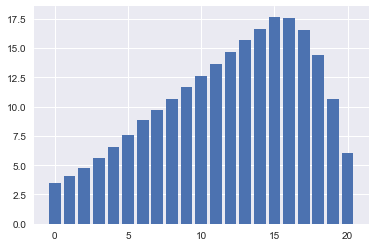


4.
For each K = 1 .. 21, what is the average payoff per round for a game played with this strategy?
Refer to 2. as that has the average values per K.

What is the best strategy for the game, meaning what value of K wins the most points on average?
I've run it a few times and I beleive 16 is the best strategy.


In [388]:
def playRound(K):
    Score = 0
    #if K == 21:                              Debugging 21
        #print("this is 21")                  Debugging 21
    while (Score < K):
        Addition = nextDiscreteUniform(0,7)
        Score = Score + Addition
        #if K == 21:                          Debugging 21
            #print("Current Score",Score)     Debugging 21
    if Score > 21:
        return 0
    else:
        # print(K, "-", Score)                Debugging 21
        return Score

overall = []
def playGame():
    print("Table of Contents:\n")
    print("1. Best Score for Each K\n2. Array of those Values\n3. Bar Graph of Distribution\n4. Answers to Questions\n")
    print("1.")
    num_trials = 10000
    for K in range(1,22):
        final = 0
        for i in range(num_trials): 
            x = playRound(K)
            final = final + x
        final = final / num_trials
        overall.append(final)
        print("\nBest score = " + str(final) + " is obtained for K =",K )
    print("\n2.")
    print("\nAll Values in one Array - ",overall)
        
playGame()

# For Bar Graph
print("\n3.")
y = [i for i in range(21)]
plt.bar(y, overall)
plt.show()

print("\n4.")
print("For each K = 1 .. 21, what is the average payoff per round for a game played with this strategy?\nRefer to 2. as that has the average values per K.\n\nWhat is the best strategy for the game, meaning what value of K wins the most points on average?\nI've run it a few times and I beleive 16 is the best strategy.")


        